## **IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from textblob import TextBlob
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

MOUNTING TO GOOGLE DRIVE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **READING THE DATASET**

In [4]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/webmd.csv')
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# **EXPLORATORY DATA ANALYSIS**

**NUMBER OF ROWS AND COLUMNS**

In [6]:
df.shape

(362806, 12)

There are 362806 records and 12 features inside the dataset

**DATA INFO**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


**DESCRIPTIVE ANALYSIS**

In [8]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [9]:
print('Number of drugs present in the dataset :',df['Drug'].nunique())
print('Number of unique medical conditions present in the dataset : ',df['Sides'].nunique())

print('\n The time period of collecting the data')
print('starting date :',df['Date'].min())
print('Ending date :',df['Date'].max())

Number of drugs present in the dataset : 7093
Number of unique medical conditions present in the dataset :  1651

 The time period of collecting the data
starting date : 1/1/2008
Ending date : 9/9/2019


In [10]:
print('Analysis of useless drug')
print('__________________________')
print('number of drugs with no useful count:', df[df['UsefulCount']==0].count()[0])

Analysis of useless drug
__________________________
number of drugs with no useful count: 71608


In [11]:
print('Analysis of useful counts')
print('___________________________')
print('Number of drugs with  more than 100 useful count: ',df[df['UsefulCount']>100].count()[0])

Analysis of useful counts
___________________________
Number of drugs with  more than 100 useful count:  133


**DESCRIPTIVE ANALYSIS OBJECT DATA TYPE**


In [12]:
df.describe(include= 'object')

,Age,Condition,Date,Drug,Reviews,Sex,Sides
count,362806,362806,362806,362806,362769,362806,362806
unique,12,1806,4524,7093,250167,3,1651
top,45-54,Other,10/29/2007,cymbalta,,Female,
freq,80043,49765,404,4648,41824,238226,17460


**BARPLOT**

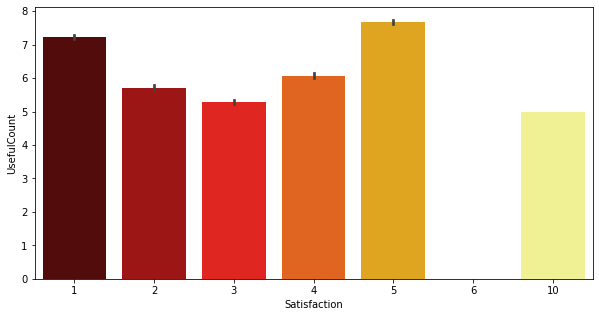

In [13]:
#checking the impact of satisfaction in usefulness
plt.rcParams['figure.figsize']=(10,5)
sns.barplot(df['Satisfaction'],df['UsefulCount'],palette='hot')
plt.show()

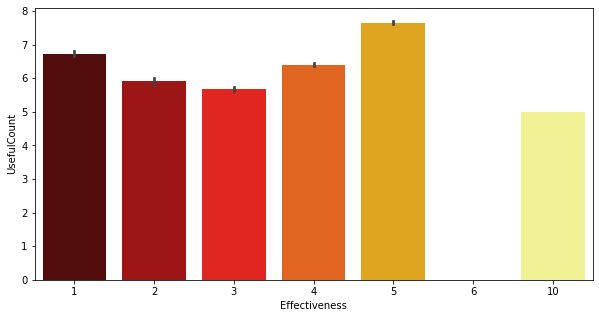

In [14]:
#checking the impact of Effectivness in usefulness
sns.barplot(df['Effectiveness'],df['UsefulCount'],palette='hot')
plt.show()

In [15]:
#Checking effectiveness Distribution
eff_=df['Effectiveness'].value_counts().sort_values(ascending=False).reset_index().\
rename(columns = {'index' :'Effectiveness', 'Effectiveness' : 'counts'})
eff_['percent'] = 100 * (eff_['counts']/df.shape[0])
print(eff_)

   Effectiveness  counts    percent
0              5  130388  35.938766
1              4   81821  22.552273
2              3   60406  16.649670
3              1   59387  16.368803
4              2   30801   8.489661
5              6       2   0.000551
6             10       1   0.000276


• More than 35% of reviews says that the drugs has effectiveness of 5 out of 10.There are effectiveness less than five and the reviews on this is in between 5% - 25%.

• Those whose says the effectiveness is higher than 5 is very less and it is countable.

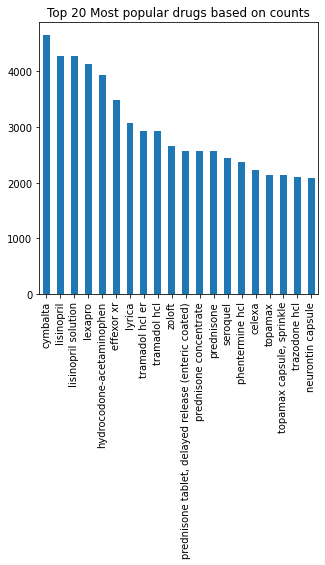

In [16]:
#plot a bargraph to check top 20 drugs used
plt.figure(figsize=(5,5))
df['Drug'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

• The most commonly used drug is Cymbalta.

• The top four drugs has count of reviews around 4000 and above.

• If we look at the top 20, around 2000 people has given reviews on each drug

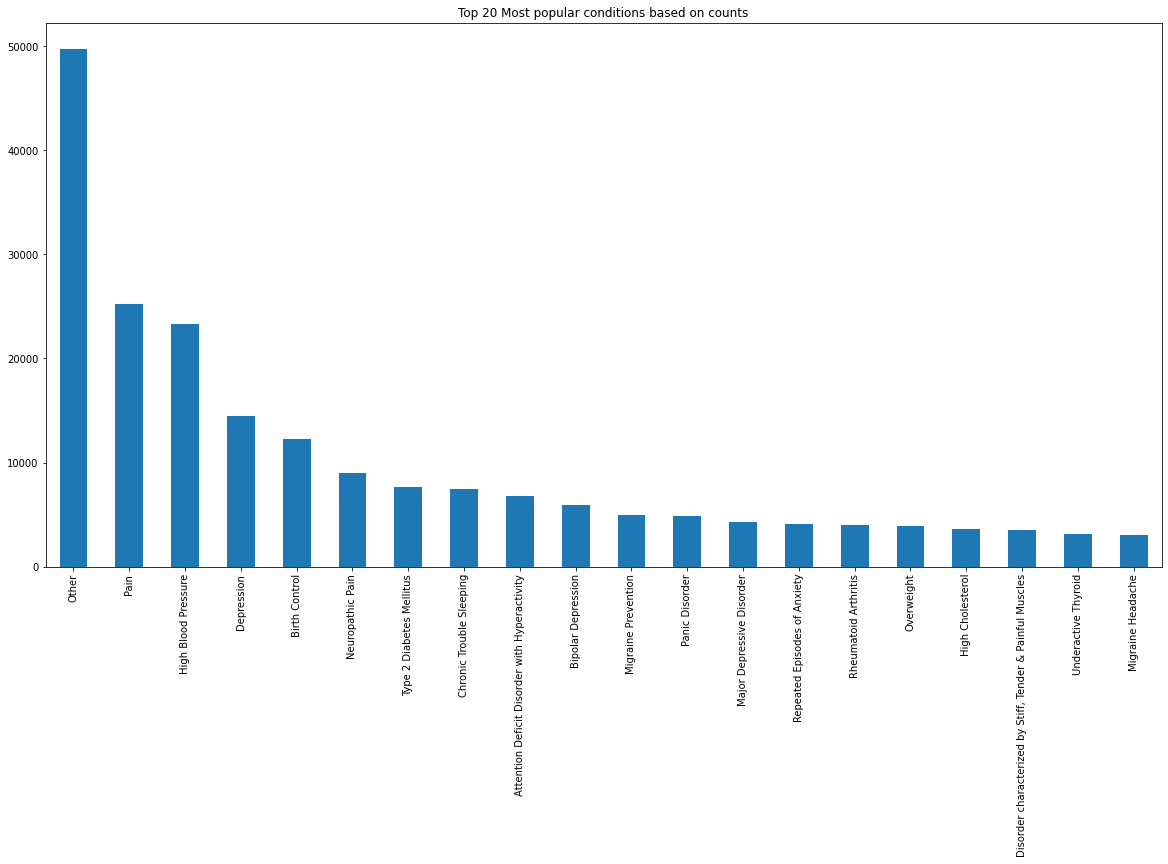

In [17]:
#plot a bargraph to check top 20 conditions
plt.figure(figsize=(5,5))
df['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))
plt.title("Top 20 Most popular conditions based on counts")
plt.show()

The top most condition is other than listed conditions.

The unlisted condition i.e, 'Other' comes around 50000 and above.

other than top one condition pain and high blood pressure conditions uses more medicine

**PIE PLOT**

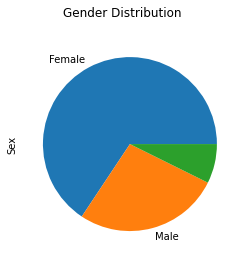

In [27]:
#pieplot
ax = df.Sex.value_counts().plot.pie(subplots = True,figsize = (8,4), title = "Gender Distribution")

Here we can see there is another data entry which is neither male or female in the gender column. We have to deal with it in the preprocessing part

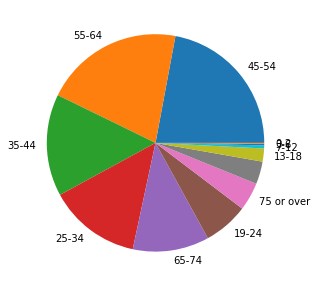

In [18]:
age = df['Age'].value_counts()
plt.pie(age.values, labels=age.index)
plt.show()

**MISSING VALUES**

In [28]:
#search for null values 
df.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

Here we can see that there are several null values in review column. 

In [29]:
#Lets drop them
df= df.dropna()

In [30]:
df.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

All the missing values in this dataset are handled

**UNIQUE VALUES**

In [ ]:
#Lets check the number of unique values in each columns
data= [[col, df[col].nunique()] for col in df.columns.difference(['Reviews'])]
uniques = pd.DataFrame(data= data, columns=['columns','number of unique values'])
print(uniques)

There are more drug than drug ID values. This means that some kind of pecularity in the drugs are named

**COUNT PLOT**

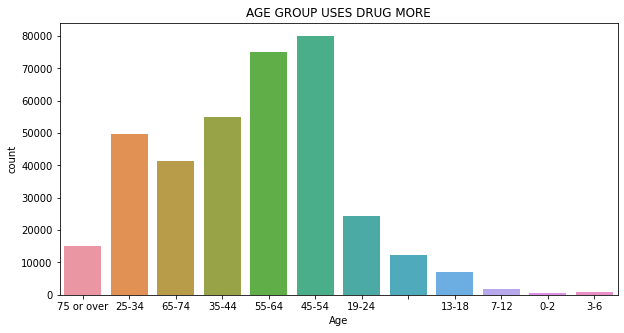

In [21]:
sns.countplot('Age', data= df)
plt.title('AGE GROUP USES DRUG MORE')
plt.show()

Here we can see that age 45-54 uses more drugs than others

# **DATA PREPROCESSING**

strip leading and trailing white spaces from string type data.

In [22]:
for col in df.columns:
    if df[col].dtype.kind == 'O':
        df[col]=df[col].str.strip()

In [23]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
